In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn import linear_model
from scipy.optimize import minimize
from keras.datasets import mnist

rcParams.update({'font.size': 18})

In [3]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [4]:
A=np.zeros((np.square(train_X.shape[1]),train_X.shape[0]))
for i in range(train_X.shape[0]):
    A[:,i]=train_X[i].flatten()

In [28]:
a = np.linalg.lstsq(A.T,train_y,rcond=None)[0]
sol=A.T@a

<BarContainer object of 784 artists>

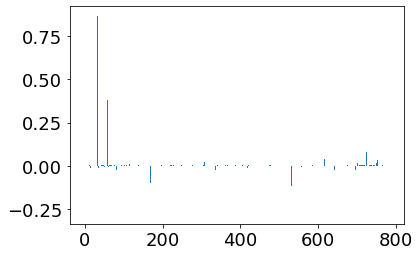

In [47]:
plt.bar(range(a.shape[0]),a)

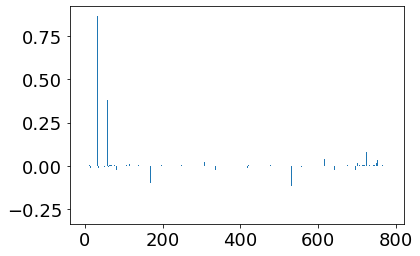

In [72]:
thresh=0.0025
indices=np.abs(a) > thresh
a_sparse= a * indices
plt.bar(range(a.shape[0]),a_sparse)
sol_sparse=A.T@a_sparse
#plt.bar(range(sol_sparse.shape[0]),sol_sparse)
err = np.linalg.norm(sol-train_y,ord=2)/np.linalg.norm(sol,ord=2)
err_sparse = np.linalg.norm(sol_sparse-train_y,ord=2)/np.linalg.norm(sol_sparse,ord=2)

In [73]:
A_test=np.zeros((np.square(test_X.shape[1]),test_X.shape[0]))
for i in range(test_X.shape[0]):
    A_test[:,i]=test_X[i].flatten()
sol_test=A_test.T@a
sol_test_sparse=A_test.T@a_sparse

In [74]:
err_test = np.linalg.norm(sol_test-test_y,ord=2)/np.linalg.norm(sol_test,ord=2)
err_test_sparse= np.linalg.norm(sol_test_sparse-test_y,ord=2)/np.linalg.norm(sol_test,ord=2)
print('Error for training set: ', err)
print('Error for sparse solution on training set: ', err_sparse)
print('Error for test set: ', err_test)
print('Error for sparse solution on test set: ', err_test_sparse)

Error for training set:  0.3878607583710504
Error for sparse solution on training set:  5.728488162013484
Error for test set:  0.3762635635032853
Error for sparse solution on test set:  0.9733915794164647
